<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/Text_Analytics68F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: เฟิร์สมินอย

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. นายวรพล พลตรี 663020038-5
2. นายวิศรุค แสนบึง 663020296-3
3. นางสาวพัชรี ดียา
4. นางสาวศิริวรรณ นวลวัน 663020585-6
5. นายเสฎฐวุฒิ นาคสังข์ 663020586-4

กำหนดส่ง: อาทิตย์ 5 ตุลาคม 2568 \
รายงานในชั้นเรียน: จันทร์ 6 ตุลาคม 2568

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [2]:
# หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip install nltk
!pip install wordcloud
!pip install Pillow
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
*หมายเหตุ: ไม่ต้องนำเสนอข้อนี้*

จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```


#### Read JSON file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# เปลี่ยน path ตรงนี้
file_path = data = '/content/drive/MyDrive/ProjectJY/thailand_tweets.txt'

In [ ]:
tweets = []
with open(file_path, 'r') as f:
    for line in f:
        tweets.append(json.loads(line))

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [ ]:
pprint.pprint(tweets[:2])

# Load into a Pandas DataFrame
tweets_df = pd.DataFrame(tweets)
tweets_df.head()

['{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": '
 '"matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": '
 '"https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, '
 '"likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", '
 '"content": "Thanks for asking! Yes, we will support shipping to most '
 'countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], '
 '"images": [], "videos": [], "tweet_url": '
 '"https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, '
 '"1564764866598080513": {"tweet_id": "1564764866598080513", "username": '
 '"DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": '
 '"https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, '
 '"likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", '
 '"content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography '
 '\\n@tombraider\\n @crystaldynamics", "hashtag

,0
0,"{""1564764893038882816"": {""tweet_id"": ""15647648..."


In [ ]:
import json
import pandas as pd

with open(file_path, 'r', encoding='utf-8') as f:
    raw_text = f.read()

print("ก่อน parse:", type(raw_text))  # น่าจะได้ str

# parse รอบแรก
outer = json.loads(raw_text)
print("หลัง parse 1:", type(outer))

# ถ้ายังเป็น str → parse อีกรอบ
if isinstance(outer, str):
    outer = json.loads(outer)
    print("หลัง parse 2:", type(outer))

print("จำนวน keys:", len(outer))

# แปลงเป็น DataFrame
df = pd.DataFrame.from_dict(outer, orient='index')
print(df.head())
print(df.columns)



ก่อน parse: <class 'str'>
หลัง parse 1: <class 'str'>
หลัง parse 2: <class 'dict'>
จำนวน keys: 29
                                tweet_id        username  \
1564764893038882816  1564764893038882816      matthunter   
1564764866598080513  1564764866598080513      DavSmithVP   
1564764845685280772  1564764845685280772    DailyPattaya   
1564764710804897792  1564764710804897792   Bryan62766077   
1564764468277612549  1564764468277612549  Megan_and_Grrr   

                                               name  \
1564764893038882816                     MATT HUNTΞR   
1564764866598080513  DavSmith / Virtual Photography   
1564764845685280772               The Pattaya Daily   
1564764710804897792                           Bryan   
1564764468277612549                           Megan   

                                              profile_picture  replies  \
1564764893038882816      https://twitter.com/matthunter/photo        2   
1564764866598080513      https://twitter.com/DavSmithVP/photo 

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
#The total number of tweets collected in the file : จำนวนทวีตทั้งหมดที่รวบรวมไว้ในไฟล์
total_tweets = len(df)
print(f"จำนวนทวีตทั้งหมดที่รวบรวมไว้ในไฟล์คือ: {total_tweets}")

จำนวนทวีตทั้งหมดที่รวบรวมไว้ในไฟล์คือ: 29


In [ ]:
#The content of the first tweet: เนื้อหาทวีตแรก:

In [ ]:
#The content of the first tweet: เนื้อหาทวีตแรก:
if 'content' in tweets_df.columns:
    first_tweet_content = tweets_df.iloc[0]['content']
    print(f"The content of the first tweet is:\n{first_tweet_content}")
else:
    print("Error: 'content' column not found in the DataFrame. Please ensure the data was loaded correctly.")

Error: 'content' column not found in the DataFrame. Please ensure the data was loaded correctly.


## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [3]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory =  '/content/drive/MyDrive/ProjectJY/yelp/'
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [ ]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [ ]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [4]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [ ]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,0,0,0,0,0,0,0,0,0,0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,14,3,1,1,63,96,86,86,49,27
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,1,0,0,0,0,0,0,0,0,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,0,0,0,0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4.0,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,Metro Diner,...,0,0,0,0,0,0,3,3,0,0
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1.0,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52,Esporta Fitness,...,0,0,0,0,0,3,0,0,0,0
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4.0,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,Buena Vista Mexican Restaurant,...,0,0,0,0,1,1,0,0,0,0
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2.0,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08,The Love,...,1,0,0,0,5,1,1,1,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

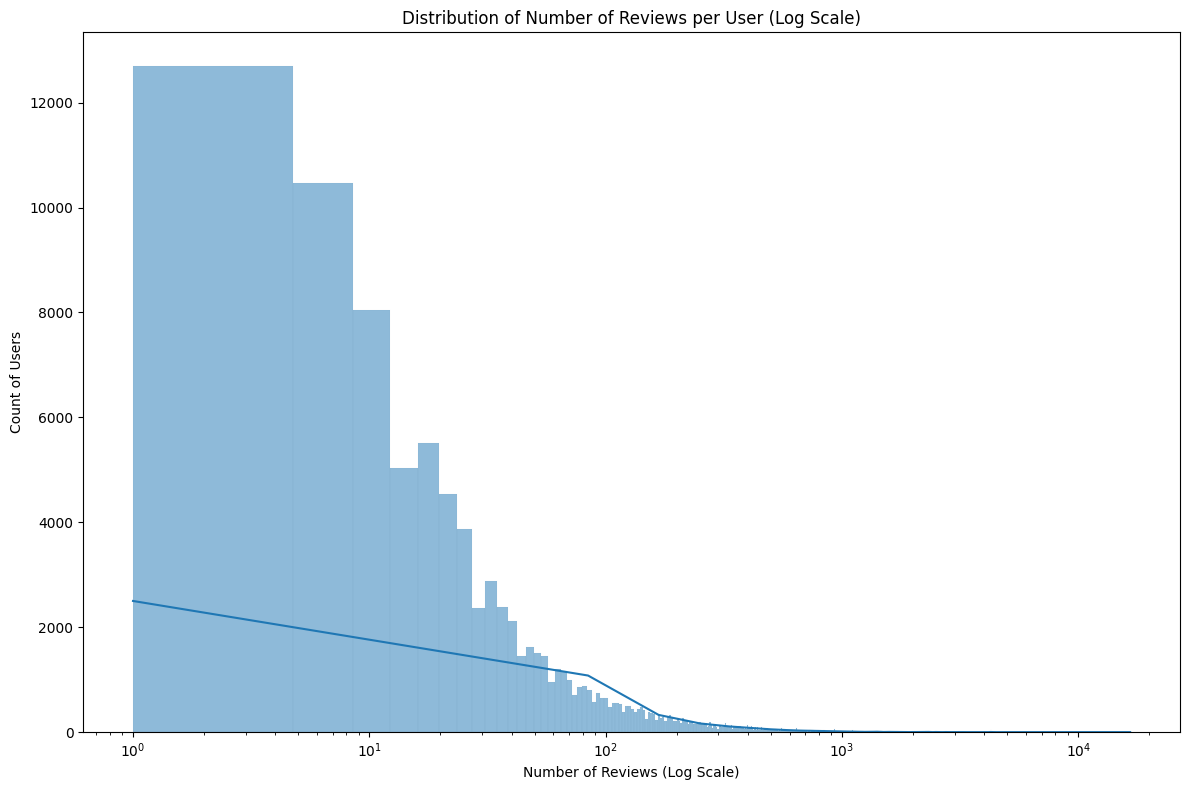

count    100000.000000
mean        121.443680
std         335.884257
min           1.000000
25%           9.000000
50%          27.000000
75%          96.000000
max       16567.000000
Name: review_count_user, dtype: float64

Median number of reviews per user: 27.0
Mode (most common) number of reviews per user: 2


In [ ]:
# ----------------- Your code here -----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your merged dataframe
# If not, uncomment and modify the following line:
# df = pd.read_csv('your_merged_data.csv')

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(12, 8))

# Histogram
sns.histplot(data=df, x='review_count_user', ax=ax, kde=True)
ax.set_xscale('log')
ax.set_title('Distribution of Number of Reviews per User (Log Scale)')
ax.set_xlabel('Number of Reviews (Log Scale)')
ax.set_ylabel('Count of Users')

plt.tight_layout()
plt.show()

# Print some statistics
print(df['review_count_user'].describe())
print(f"\nMedian number of reviews per user: {df['review_count_user'].median()}")
print(f"Mode (most common) number of reviews per user: {df['review_count_user'].mode().values[0]}")

สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

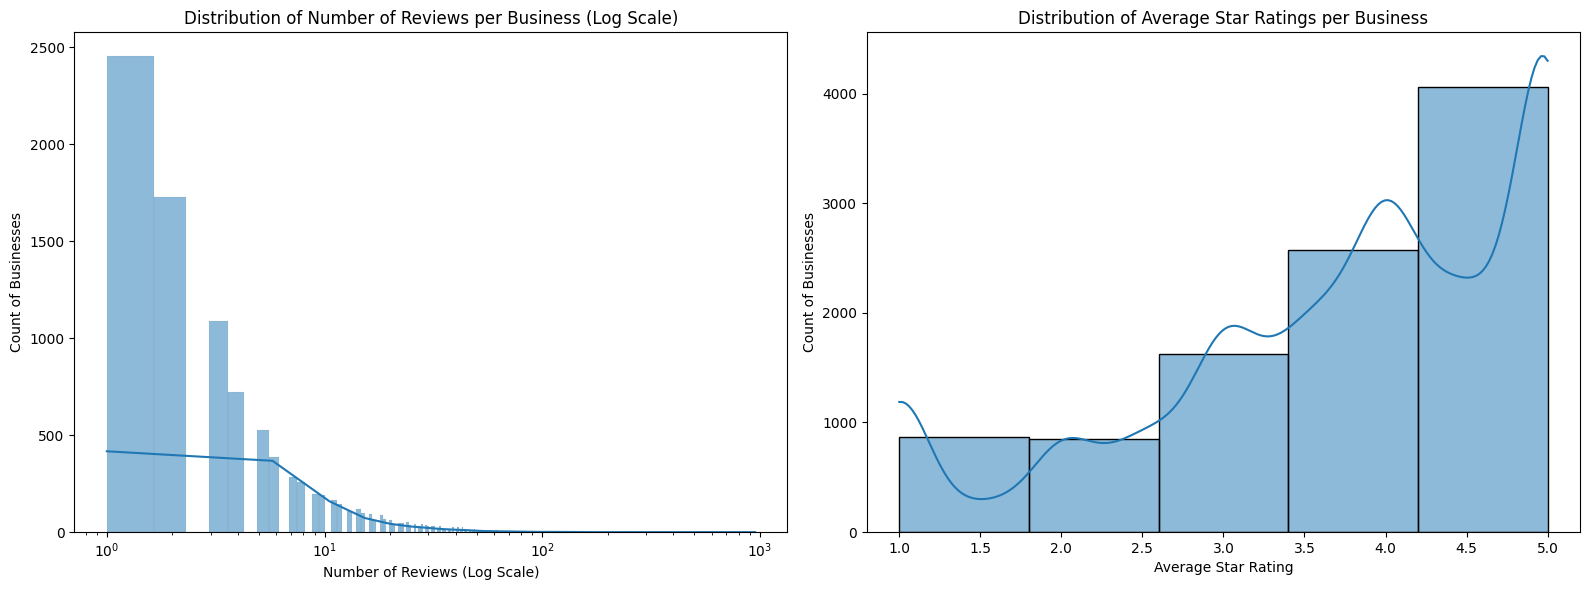

count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       950.000000
Name: review_count, dtype: float64

Median number of reviews per business: 3.0
Mode (most common) number of reviews per business: 1
count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
25%         3.000000
50%         4.000000
75%         4.750000
max         5.000000
Name: avg_stars, dtype: float64

Median average stars per business: 4.0
Mode (most common) average stars per business: 5.0


In [ ]:
# ----------------- Your code here -----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# prompt: สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

# Assuming df is your merged dataframe
# If not, uncomment and modify the following line:
# df = pd.read_csv('your_merged_data.csv')

# Group by business ID and count reviews and calculate average stars
business_stats = df.groupby('business_id').agg({'review_id': 'count', 'stars_review': 'mean'})
business_stats = business_stats.rename(columns={'review_id': 'review_count', 'stars_review': 'avg_stars'})

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of review count
sns.histplot(data=business_stats, x='review_count', ax=axes[0], kde=True)
axes[0].set_xscale('log')
axes[0].set_title('Distribution of Number of Reviews per Business (Log Scale)')
axes[0].set_xlabel('Number of Reviews (Log Scale)')
axes[0].set_ylabel('Count of Businesses')

# Histogram of average stars
sns.histplot(data=business_stats, x='avg_stars', ax=axes[1], kde=True, bins=5)
axes[1].set_title('Distribution of Average Star Ratings per Business')
axes[1].set_xlabel('Average Star Rating')
axes[1].set_ylabel('Count of Businesses')

plt.tight_layout()
plt.show()

# Print some statistics
print(business_stats['review_count'].describe())
print(f"\nMedian number of reviews per business: {business_stats['review_count'].median()}")
print(f"Mode (most common) number of reviews per business: {business_stats['review_count'].mode().values[0]}")

print(business_stats['avg_stars'].describe())
print(f"\nMedian average stars per business: {business_stats['avg_stars'].median()}")
print(f"Mode (most common) average stars per business: {business_stats['avg_stars'].mode().values[0]}")


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [ ]:
# ----------------- Your code here -----------------
# Assuming 'df' is your merged DataFrame with 'categories' column
from collections import Counter
import pandas as pd

# Create a list to store all categories
all_categories = []
for categories in df['categories'].dropna():  # Handle potential missing values
  for category in categories.split(', '):
    all_categories.append(category)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Count the number of unique categories
unique_categories_count = len(set(all_categories))
print(f"Total number of unique categories: {unique_categories_count}")
# Display the top 10 most frequent categories
print("Top 10 most frequent business categories:")
for category, count in category_counts.most_common():
  print(f"{category}: {count}")

# Alternatively, you can create a DataFrame for better visualization
category_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_df = category_df.sort_values('Count', ascending=False)
category_df

Total number of unique categories: 980
Top 10 most frequent business categories:
Restaurants: 72124
Food: 29650
Nightlife: 23298
Bars: 21927
American (New): 16538
American (Traditional): 14200
Breakfast & Brunch: 13984
Sandwiches: 10015
Event Planning & Services: 9954
Seafood: 7950
Coffee & Tea: 7824
Pizza: 7245
Burgers: 7194
Mexican: 6748
Italian: 6572
Shopping: 6200
Hotels & Travel: 6034
Arts & Entertainment: 5790
Cafes: 5412
Cocktail Bars: 5096
Beauty & Spas: 4887
Salad: 4632
Hotels: 4272
Cajun/Creole: 4129
Specialty Food: 3912
Venues & Event Spaces: 3809
Sushi Bars: 3642
Pubs: 3557
Beer: 3516
Wine & Spirits: 3516
Bakeries: 3475
Japanese: 3454
Desserts: 3336
Caterers: 3072
Chinese: 3030
Southern: 2984
Fast Food: 2887
Ice Cream & Frozen Yogurt: 2872
Sports Bars: 2861
Barbeque: 2739
Steakhouses: 2734
Active Life: 2529
Wine Bars: 2514
Vegetarian: 2511
Automotive: 2355
Asian Fusion: 2353
Diners: 2181
Juice Bars & Smoothies: 2110
Lounges: 2073
Thai: 2070
Music Venues: 2065
Local Services

,Count
Restaurants,72124
Food,29650
Nightlife,23298
Bars,21927
American (New),16538
...,...
Psychologists,1
Airsoft,1
Body Contouring,1
Trailer Repair,1


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

<ระบุจุดประสงค์ของการศึกษา>

#### เมืองใดมีจำนวนธุรกิจเยอะที่สุด

In [ ]:
# Group by city and get the business_ids for each city
city_business_ids = businesses.groupby('city')['business_id'].apply(list)

# Count the number of businesses in each city
city_business_counts = businesses['city'].value_counts()

# Display the business_ids for the first 5 cities and the business counts for all cities
print("Business IDs per city (first 5 cities):")
print(city_business_ids.head())

print("\nNumber of businesses per city:")
print(city_business_counts)

Business IDs per city (first 5 cities):
city
AB Edmonton                             [VB5LN92Hfk4A34YtJ0eUoQ]
AMBLER                                  [X-kWHq70nkI8jN6-waFEOg]
ARDMORE                                 [TJcRyJF-DYbXuABEemLH5g]
AVON                                    [jPFFeyh7RmmxzQmYgAAPQA]
Abington       [1U-4B5gkUATXtsZrZ-KwSw, pf4hV73PkEyNAhADEaNLX...
Name: business_id, dtype: object

Number of businesses per city:
city
Philadelphia         14569
Tucson                9250
Tampa                 9050
Indianapolis          7540
Nashville             6971
                     ...  
Wesley Chapel  FL        1
Monchanin                1
Lower Southampton        1
CHELTENHAM               1
Reno Sparks              1
Name: count, Length: 1416, dtype: int64


In [ ]:
import plotly.express as px

# Assuming city_business_counts Series is available from previous steps
# If not, uncomment and run the code to create it:
# city_business_counts = businesses['city'].value_counts()

# Select the top 10 cities
top_10_cities = city_business_counts.head(10)

fig = px.bar(top_10_cities, x=top_10_cities.index, y=top_10_cities.values, title="Top 10 Cities by Number of Businesses (Plotly)")
fig.update_layout(xaxis_title="City", yaxis_title="Number of Businesses")
fig.show()

In [ ]:
from collections import Counter

# Filter businesses in Philadelphia
philadelphia_businesses = businesses[businesses['city'] == 'Philadelphia'].copy()

# Create a list to store all categories for Philadelphia businesses
philadelphia_categories = []
for categories in philadelphia_businesses['categories'].dropna():
  for category in categories.split(', '):
    philadelphia_categories.append(category)

# Use Counter to count the frequency of each category
philadelphia_category_counts = Counter(philadelphia_categories)

# Get the top 5 most frequent categories
top_5_philadelphia_categories = philadelphia_category_counts.most_common(5)

print("5 อันดับแรกของประเภทธุรกิจใน Philadelphia:")
for category, count in top_5_philadelphia_categories:
  print(f"- {category}: {count}")

5 อันดับแรกของประเภทธุรกิจใน Philadelphia:
- Restaurants: 5852
- Food: 3105
- Shopping: 2091
- Nightlife: 1463
- Beauty & Spas: 1320


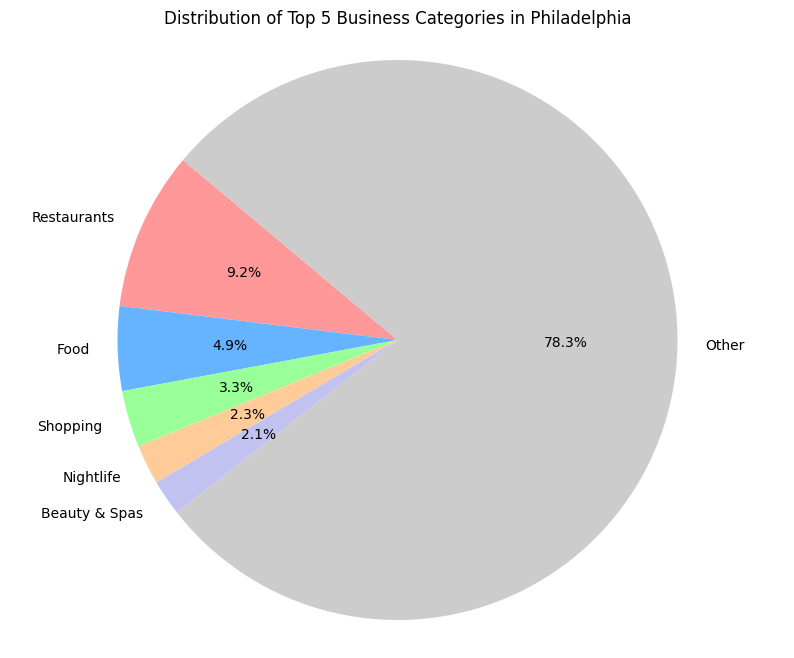

In [ ]:
import matplotlib.pyplot as plt

# Assuming philadelphia_category_counts is available from the previous cell
# Calculate the sum of counts for the top 5 categories
top_5_count = sum(count for category, count in top_5_philadelphia_categories)

# Calculate the count for "Other" categories
total_count = sum(philadelphia_category_counts.values())
other_count = total_count - top_5_count

# Create labels and sizes for the pie chart
labels = [category for category, count in top_5_philadelphia_categories] + ['Other']
sizes = [count for category, count in top_5_philadelphia_categories] + [other_count]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0', '#cccccc'] # Example colors

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Business Categories in Philadelphia')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### ธุรกิจที่มีการรีวิวมากที่สุด

In [ ]:
# Find the top 10 businesses with the highest review count
top_10_most_reviewed_businesses = businesses.nlargest(10, 'review_count')

print("Top 10 businesses with the highest review count:")
display(top_10_most_reviewed_businesses)

Top 10 businesses with the highest review count:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
113731,_ab50qdWOk0DdB6XOrBitw,Acme Oyster House,724 Iberville St,New Orleans,LA,70130,29.954273,-90.068965,4.0,7568,1,"{'RestaurantsTakeOut': 'True', 'Alcohol': ''fu...","Live/Raw Food, Seafood, Restaurants, Cajun/Creole","{'Monday': '11:0-22:0', 'Thursday': '11:0-22:0..."
112552,ac1AeYqs8Z4_e2X5M3if2A,Oceana Grill,739 Conti St,New Orleans,LA,70130,29.956231,-90.067563,4.0,7400,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Restaurants, Seafood, Cajun/Creole, Breakfast ...","{'Monday': '8:0-1:0', 'Tuesday': '8:0-1:0', 'W..."
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ..."
143157,ytynqOUb3hjKeJfRj5Tshw,Reading Terminal Market,51 N 12th St,Philadelphia,PA,19107,39.953341,-75.158855,4.5,5721,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Candy Stores, Shopping, Department Stores, Fas...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
147081,oBNrLz4EDhiscSlbOl8uAw,Ruby Slipper - New Orleans,200 Magazine St,New Orleans,LA,70130,29.951025,-90.067394,4.5,5193,1,"{'NoiseLevel': ''loud'', 'Caters': 'False', 'B...","Restaurants, American (Traditional), American ...","{'Monday': '0:0-0:0', 'Tuesday': '7:30-14:0', ..."
100024,iSRTaT9WngzB8JJ2YKJUig,Mother's Restaurant,401 Poydras St,New Orleans,LA,70130,29.949057,-90.067049,3.5,5185,1,"{'RestaurantsGoodForGroups': 'True', 'BYOBCork...","Cajun/Creole, Restaurants, Event Planning & Se...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '..."
31033,VQcCL9PiNL_wkGf-uF3fjg,Royal House,441 Royal St,New Orleans,LA,70130,29.956473,-90.066386,4.0,5070,1,"{'WiFi': 'u'free'', 'Caters': 'False', 'Outdoo...","American (New), Restaurants, Sandwiches, Seafo...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
31332,_C7QiQQc47AOEv4PE3Kong,Commander's Palace,1403 Washington Ave,New Orleans,LA,70130,29.928735,-90.084196,4.5,4876,1,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","French, Restaurants, Cocktail Bars, Nightlife,...","{'Monday': '0:0-0:0', 'Tuesday': '18:0-21:30',..."
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
97331,6a4gLLFSgr-Q6CZXDLzBGQ,Cochon,930 Tchoupitoulas St,New Orleans,LA,70130,29.942280,-90.067268,4.0,4421,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Cajun/Creole, Seafood, Restaurants","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."


In [ ]:
import plotly.express as px

# Assuming top_10_most_reviewed_businesses DataFrame is available from previous steps
# If not, uncomment and run the code to create it:
# top_10_most_reviewed_businesses = businesses.nlargest(10, 'review_count')

fig = px.bar(top_10_most_reviewed_businesses, x='name', y='review_count', title='Top 10 Businesses by Review Count')
fig.update_layout(xaxis_title="Business Name", yaxis_title="Review Count")
fig.show()

#### ผู้ใช้ yelp ที่มีผู้ติดตามเยอะที่สุด

In [7]:
# Find the top 5 users with the most fans
top_5_most_fans_users = users.nlargest(5, 'fans')

# Reorder columns to display 'fans' before 'review_count'
cols = top_5_most_fans_users.columns.tolist()
cols.insert(2, cols.pop(cols.index('fans'))) # Move 'fans' to index 2 (after user_id and name)
top_5_most_fans_users = top_5_most_fans_users[cols]

print("Top 5 users with the most fans:")
display(top_5_most_fans_users)

Top 5 users with the most fans:


,user_id,name,fans,review_count,yelping_since,useful,funny,cool,elite,friends,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
5444,37cpUoM8hlkSQfReIEBd-Q,Mike,12497,1882,2009-04-25 14:54:26,22860,10965,15350,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...","fLRfYMFIRzjX28OFTsCu4g, pEIzH_tNwK7pcqTViKm-RQ...",...,112,61,130,29,453,685,1002,1002,498,1829
198889,hizGc5W1tBHPghM5YKCAtg,Katie,3642,1825,2009-05-22 20:19:55,48711,32078,39747,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","wHrIy02OYTKYT1YdxPjhwg, 9myTU-JiWk-WaC9LlzK1iw...",...,430,419,375,253,3152,18529,7910,7910,2543,1676
17169,Hi10sGSZNxQH3NLyWSZ1oA,Fox,3493,17473,2009-05-26 11:33:58,206296,185823,195814,"2014,2015,2016,2017,2018,2019,20,20,2021","uZcWE40gWJHjLT_VyNBp1Q, N52nbyDKZte4PUfJVNpkGQ...",...,431,402,130,45,2408,6565,7655,7655,1644,4053
200787,JjXuiru1_ONzDkYVrHN0aw,Richard,3243,1424,2009-08-23 13:03:27,183512,129638,173423,"2011,2012,2013,2014,2015,2016,2017,2018,2019,2...","7Ie3f_4upzsMNAY07d19kA, SmkjLDoFYRBIfY0D8KevSQ...",...,4138,6411,2974,2413,13970,101097,49967,49967,15934,56104
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,3138,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",...,264,184,157,251,1847,7054,3131,3131,1521,1946


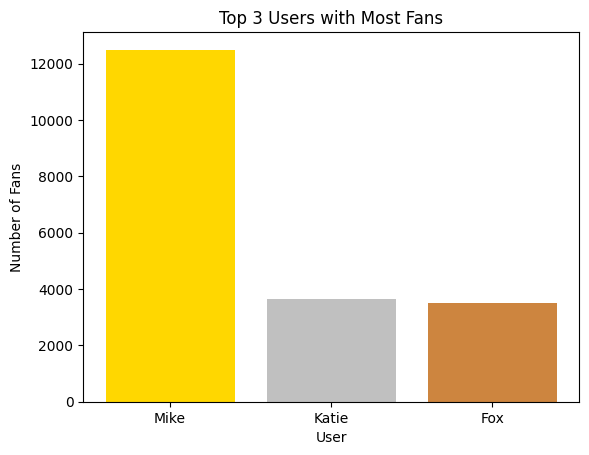

In [6]:
import matplotlib.pyplot as plt

top_fans = users.nlargest(3, 'fans')
plt.bar(top_fans['name'], top_fans['fans'], color=['gold', 'silver', 'peru'])
plt.title('Top 3 Users with Most Fans')
plt.xlabel('User')
plt.ylabel('Number of Fans')
plt.show()


#### ธุรกิจที่มีรีวิวว่างเจ๋งเยอะที่สุด (มั้ง)

In [ ]:
# Find the top 10 businesses with the highest cool_review_business count
top_10_most_cool_businesses = df.nlargest(10, 'cool_review_business')

print("Top 10 businesses with the highest 'cool' review count:")
display(top_10_most_cool_businesses)

Top 10 businesses with the highest 'cool' review count:


,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
37555,V9xenlDXTLHe_bvW9UYopw,lMY8NBPyzlPbbu-KBYfD9A,GBTPC53ZrG1ZBY3DT8Mbcw,5.0,48,38,49,Upscale bar/restaurant with an adjoining elega...,2016-01-19 21:34:15,Luke,...,170,270,95,41,1082,3543,3178,3178,723,1883
7741,9C4KrIedzOq9d7UMK5NRqA,p8oPsHwTO-gzJrgrKFuwtw,DnD5RBKabgBcREYY2llPKg,5.0,91,0,44,fast service and superb skills. this is by far...,2011-03-22 03:39:50,Anytime Locksmith,...,0,0,0,0,0,1,0,0,0,0
84693,TbMjNXhlio6EYCYV3qTP_Q,lMY8NBPyzlPbbu-KBYfD9A,RgAUDZXDJYwz7BI6u9aP5w,5.0,45,28,42,There was so many items I'd been looking forwa...,2016-03-01 13:57:43,Reeds American Table,...,170,270,95,41,1082,3543,3178,3178,723,1883
82270,ZKR2gKSMiuLvz3atq3elYg,gtyhTlWKr2zXVhKKVL23hg,bjsBMTS4RD7Bs35ugv_fPA,4.0,41,0,41,The first time I went here was in May of 2011 ...,2012-11-12 19:39:31,The Eagle Inn,...,0,0,0,0,0,0,0,0,0,0
52316,os98NxRaLT_4SKPbEtjzAQ,Kj-u8Yq1d3mLKitWsDAxpg,GJC3QI31IV5Q4kVHIM498Q,4.0,33,30,33,The burritos are huge and I chose the shredded...,2009-08-12 11:02:53,Dos Amores Mexican Cuisine,...,1220,1387,1224,1165,2238,5906,8258,8258,2613,2296
10006,rysB3rPCaCYRvOXTyMAIng,Kj-u8Yq1d3mLKitWsDAxpg,gGyqnAlpFrka_qzpO7j4lQ,5.0,31,25,32,Take me out to the ball game! Take me to Citi...,2009-05-20 15:33:37,Citizens Bank Park,...,1220,1387,1224,1165,2238,5906,8258,8258,2613,2296
64724,Zh7b3ctClwUFD4sfVt2rqQ,lMY8NBPyzlPbbu-KBYfD9A,6yw6rcys6FuMnbatD0lEcA,5.0,34,27,32,"Ok, so this may be a real shocker... but just ...",2016-05-07 21:43:03,Starbucks,...,170,270,95,41,1082,3543,3178,3178,723,1883
40672,DpZCSeWZr5I9gCd7ZSZeQg,nqcKPe9LWxBFz0aZ23x0Qw,hn3Rg2JrhQoDJBEhrpuwWg,4.0,33,19,31,First time to Granite City and I am a fan. We...,2013-03-19 22:10:14,Granite City Food & Brewery,...,0,0,0,0,0,2,0,0,0,0
28584,0kJ55ldjOC-M8-zIaJXwwA,KZ7qDHhrSWtvnP1YIEKdXQ,hn3Rg2JrhQoDJBEhrpuwWg,4.0,29,18,29,We have been 3 times and loved it every time. ...,2013-02-24 02:08:27,Granite City Food & Brewery,...,0,0,0,0,0,0,0,0,0,0
34683,dqXQcFEqhocigjORAjO_Tg,WpNl01DEHOOEM92IjW6-2Q,hn3Rg2JrhQoDJBEhrpuwWg,4.0,31,17,29,Buffet on Sunday was wonderful- great quality ...,2013-03-21 14:11:26,Granite City Food & Brewery,...,1,1,0,0,1,0,0,0,0,0


In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






#### คำถามของเบียร์

Top 10 most popular business categories based on review count:
                    Category  Count
0                Restaurants  72124
1                       Food  29650
2                  Nightlife  23298
3                       Bars  21927
4             American (New)  16538
5     American (Traditional)  14200
6         Breakfast & Brunch  13984
7                 Sandwiches  10015
8  Event Planning & Services   9954
9                    Seafood   7950


/tmp/ipython-input-2335130157.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




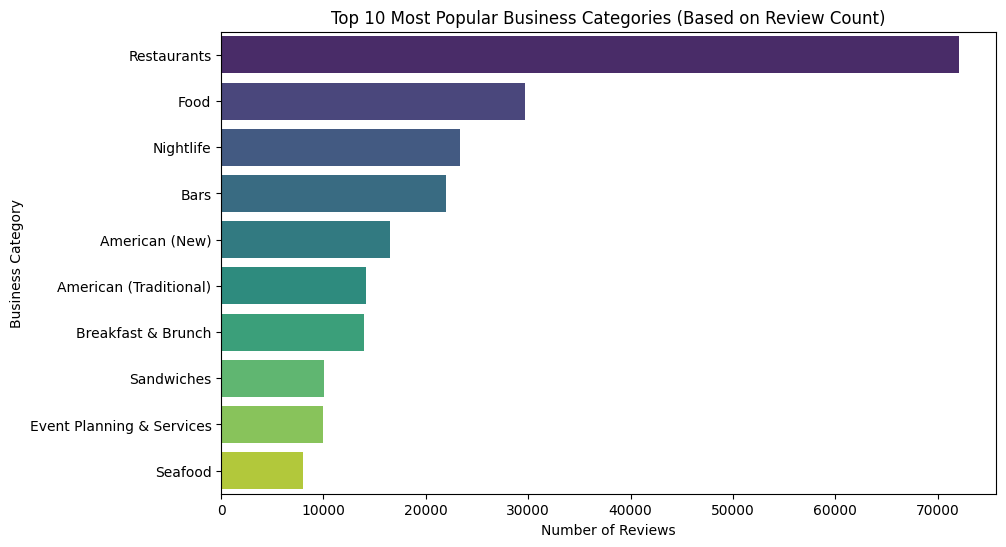

In [ ]:
# ----------------- Your analysis code here -----------------
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your merged DataFrame with 'categories' column

# Create a list to store all categories
all_categories = []
for categories in df['categories'].dropna():  # Handle potential missing values
  for category in categories.split(', '):
    all_categories.append(category)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Get the top 10 most frequent categories for visualization
top_10_categories = category_counts.most_common(10)
top_10_categories_df = pd.DataFrame(top_10_categories, columns=['Category', 'Count'])

print("Top 10 most popular business categories based on review count:")
print(top_10_categories_df)

# Visualize the top 10 categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Category', data=top_10_categories_df, palette='viridis')
plt.title('Top 10 Most Popular Business Categories (Based on Review Count)')
plt.xlabel('Number of Reviews')
plt.ylabel('Business Category')
plt.show()

/tmp/ipython-input-1094595789.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




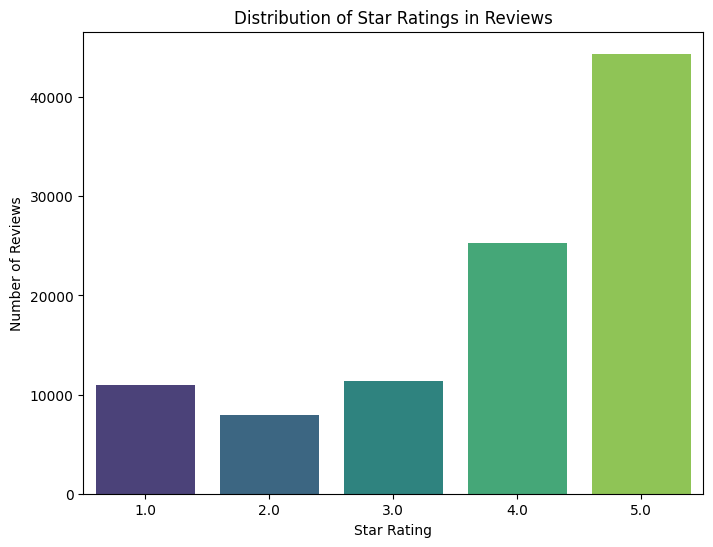


Distribution of Star Ratings:
stars_review
1.0    10921
2.0     7988
3.0    11362
4.0    25337
5.0    44392
Name: count, dtype: int64


In [ ]:
# ----------------- Your analysis code here -----------------
import matplotlib.pyplot as plt
import seaborn as sns

# การแจกแจงของจำนวนดาวที่ผู้ใช้ให้โดยรวม
plt.figure(figsize=(8, 6))
sns.countplot(x='stars_review', data=df, palette='viridis')
plt.title('Distribution of Star Ratings in Reviews')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.show()

print("\nDistribution of Star Ratings:")
print(df['stars_review'].value_counts().sort_index())

## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

In [ ]:
#----------------------------------------------
# Your code starts here


เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [ ]:
#----------------------------------------------
# Your code starts here


Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [ ]:
#----------------------------------------------
# Your code starts here


-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **